In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dimao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Считывание из файла

In [15]:
with open('data.json', 'r') as file:
    data2 = json.load(file)

data2['colour'] = list(map(lambda x: [0, 0, 0] if x == None else x, data2['colour']))
data2['text'] = list(map(lambda x: ' '.join(x), data2['text']))

In [17]:
train_index = []
test_index = []
loaded_data = pd.DataFrame(data2)
colours = pd.DataFrame(list(loaded_data['colour']), columns=["red", "green", 'blue'])
vectorizer = CountVectorizer(ngram_range=(1,1))
vectorized_texts = vectorizer.fit_transform(data2['text'])
vocabulary = list(map(lambda x: 'word_' + x, vectorizer.get_feature_names_out()))

for i in loaded_data.index:
    result = np.random.choice(2, p=[.65,.35])
    if result == 1:
        test_index.append(i)
    else:
        train_index.append(i)

y_train = loaded_data.iloc[train_index]['virality'].astype(int)
x_train = loaded_data.iloc[train_index][['photo', 'video', 'audio', 'words']]
x_train = pd.merge(x_train, pd.DataFrame(vectorized_texts[train_index].toarray(), index=x_train.index, columns=vocabulary), left_index=True, right_index=True)
x_train = pd.merge(x_train, colours, left_index=True, right_index=True)

y_test = loaded_data.iloc[test_index]['virality'].astype(int)
x_test = loaded_data.iloc[test_index][['photo', 'video', 'audio', 'words']]
x_test = pd.merge(x_test, pd.DataFrame(vectorized_texts[test_index].toarray(), index=x_test.index, columns=vocabulary), left_index=True, right_index=True)
x_test = pd.merge(x_test, colours, left_index=True, right_index=True)

x_train
y_actual = y_test

In [ ]:
x_train

,photo,video,audio,words,word_aa,word_aao,word_ab,word_abc,word_abola,word_abwauy,...,word_ясно,word_ясным,word_яхте,word_ячмень,word_ячменя,word_ящик,word_ящикoв,red,green,blue
0,3,1,0,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,135.270697,135.641027,141.126871
1,1,3,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,119.864314,94.665178,77.405878
3,2,2,0,84,0,0,0,0,0,0,...,0,0,0,0,0,0,0,104.787349,81.677017,56.275102
4,3,0,0,34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,122.265034,106.368080,111.867143
6,0,1,0,51,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,98.508189,70.928720,70.573112
9992,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,112.452995,125.114325,99.990411
9995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,68.268220,39.194006,47.581326
9996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.000000,0.000000


Random forest

In [ ]:
#rf = RandomForestRegressor(n_estimators=1000, verbose=True)
#rf.fit(x_train, y_train)

c:\Users\dimao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 15.7min finished


RandomForestRegressor(n_estimators=1000, verbose=True)

In [ ]:
#rf_y_pred = rf.predict(x_test)

#rf_deltas = pd.DataFrame(list(zip(rf_y_pred, y_actual, (rf_y_pred -
#y_actual)/(y_actual))), columns=['predicted', 'actual', 'delta'])

XGBoost

In [ ]:
#xgb = XGBRegressor()
#xgb.fit(x_train, y_train)

In [ ]:
#xgb_y_pred = xgb.predict(x_test)

#xgb_deltas = pd.DataFrame(list(zip(xgb_y_pred, y_actual, (xgb_y_pred -
#y_actual)/(y_actual))), columns=['predicted', 'actual', 'delta'])

CatBoost

In [11]:
cb = CatBoostRegressor()
cb.fit(x_train, y_train, verbose=False)

In [18]:
cb_y_pred = cb.predict(x_test)

cb_deltas = pd.DataFrame(list(zip(cb_y_pred, y_actual, (cb_y_pred -
y_actual)/(y_actual))), columns=['predicted', 'actual', 'delta'])


SVR

In [ ]:
#svr = SVR()
#svr.fit(x_train, y_train)

In [ ]:
#svr_y_pred = svr.predict(x_test)

#svr_deltas = pd.DataFrame(list(zip(svr_y_pred, y_actual, (svr_y_pred -
#y_actual)/(y_actual))), columns=['predicted', 'actual', 'delta'])

MPL

In [ ]:
#mpl = MLPRegressor()
#mpl.fit(x_train, y_train)

In [ ]:
#mpl_y_pred = mpl.predict(x_test)

#mpl_deltas = pd.DataFrame(list(zip(mpl_y_pred, y_actual, (mpl_y_pred -
#y_actual)/(y_actual))), columns=['predicted', 'actual', 'delta'])

Вывод

In [19]:
#print(f"Random forest = {np.sqrt(np.mean((rf_y_pred-y_actual)**2))/np.mean(y_actual)}")
#print(f"XGBoost = {np.sqrt(np.mean((xgb_y_pred-y_actual)**2))/np.mean(y_actual)}")
print(f"CatBoost = {np.sqrt(np.mean((cb_y_pred-y_actual)**2))/np.mean(y_actual)}")
#print(f"SVR = {np.sqrt(np.mean((svr_y_pred-y_actual)**2))/np.mean(y_actual)}")
#print(f"MPL = {np.sqrt(np.mean((mpl_y_pred-y_actual)**2))/np.mean(y_actual)}")

CatBoost = 1.484229740191947


График

<AxesSubplot:>

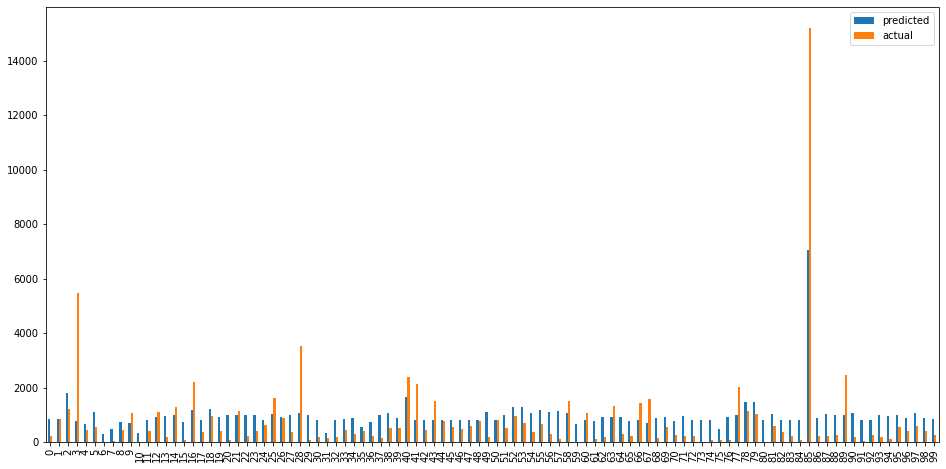

In [33]:
cb_deltas[['predicted','actual']].iloc[:100,:].plot(kind='bar', figsize=(16,8))

Выгрузка

In [ ]:
cb.save_model("model")